<a href="https://colab.research.google.com/github/jebbica/LevelData-Project-1B/blob/main/district18_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#extract benchmarks
with open('/content/drive/MyDrive/Level Data Datasets/district 18/benchmarks_202410011642.json') as benchmarks_data:
    data = json.load(benchmarks_data)
    records = data[next(iter(data))]  # Get the list of records
    benchmarks = pd.DataFrame(records)


In [4]:
#extract attributes
with open('/content/drive/MyDrive/Level Data Datasets/district 18/2023 District 18 Student Attributes.json') as attribute_data:
    sa_json = json.load(attribute_data)  # Load JSON data
    records = sa_json[next(iter(sa_json))]  # Get the list of records
    student_attributes = pd.DataFrame(records)

In [5]:
#extract scores

with open('/content/drive/MyDrive/Level Data Datasets/district 18/2023 District 18 Scores.json') as scores_data:
    sc_json = json.load(scores_data)
    records = sc_json[next(iter(sc_json))]  # Get the list of records
    scores = pd.DataFrame(records)

In [6]:
#extract vendor student usage

with open('/content/drive/MyDrive/Level Data Datasets/district 18/2023 District 18 Vendor Student Usage.json') as vendor_usage_data:
    vu_json = json.load(vendor_usage_data)
    records = vu_json[next(iter(vu_json))]  # Get the list of records
    vendor_usage = pd.DataFrame(records)

In [7]:
#extract vendor types

with open('/content/drive/MyDrive/Level Data Datasets/district 18/District 18 Vendor Usage Types.json') as vendor_type_data:
    vt_json = json.load(vendor_type_data)
    records = vt_json[next(iter(vt_json))]  # Get the list of records
    vendor_types = pd.DataFrame(records)

In [8]:
#extract vendor student usage

with open('/content/drive/MyDrive/Level Data Datasets/2024-09-11 District A Vendor Student Usage.json') as vendor_usage_data_A:
    vu_json_A = json.load(vendor_usage_data_A)
    records = vu_json_A[next(iter(vu_json_A))]  # Get the list of records
    vendor_usage_A = pd.DataFrame(records)

#extract vendor types
with open('/content/drive/MyDrive/Level Data Datasets/2024-09-11 District A Vendor Usage Types.json') as vendor_usage_data_A:
    vt_json_A = json.load(vendor_usage_data_A)
    records = vt_json_A[next(iter(vt_json_A))]  # Get the list of records
    vendor_types_A = pd.DataFrame(records)

##District A Vendor Data

In [9]:
vendor_types_A

,id,name,districtId,usageTypeId,roiBucketType,initiativeId,vendorId,utilBucketType,weeklyUsageMinutes
0,4,iReady Reading Non,45,1,loss,61,11333,nonUser,0
1,5,iReady Reading Partial,45,2,loss,61,11333,partialUser,0
2,6,iReady Reading User,45,3,gain,61,11333,fullUser,0
3,7,iReady Math Non User,45,4,loss,60,11333,nonUser,0
4,8,iReady Math Partial,45,5,loss,60,11333,partialUser,0
5,9,iReady Math User,45,6,gain,60,11333,fullUser,0
6,86,BBB Literacy Professional Non,45,7,loss,61,11464,nonUser,0
7,87,BBB Literacy Professional Partial,45,8,gain,61,11464,fullUser,0
8,88,BBB Literacy Professional User,45,9,gain,61,11464,fullUser,0


In [10]:
vendor_types_A['vendorId'].unique()
vendortype_breakdown_A = vendor_types_A['vendorId'].value_counts(normalize=True) * 100
print(vendortype_breakdown_A)

vendorId
11333    66.666667
11464    33.333333
Name: proportion, dtype: float64


In [11]:
vendor_usage_A

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0
...,...,...,...,...,...,...,...
158002,206158,72609,58573,0,2018,1,0
158003,206159,11333,52655,0,2018,1,0
158004,206160,11333,52655,0,2018,2,0
158005,206161,11333,58573,0,2018,1,0


In [12]:
vendor_breakdown_A = vendor_usage_A['vendorId'].value_counts(normalize=True) * 100
print(vendor_breakdown_A)

vendorId
11333    29.278450
36130    19.339650
62382    19.339650
27172     4.432715
72609     4.299810
39195     3.820717
23165     2.996703
62509     2.751777
62508     2.751777
63616     2.466979
22410     2.466979
52448     1.777136
52447     1.777136
25405     0.790471
61673     0.411374
37017     0.410741
11464     0.358845
37269     0.239230
7273      0.155689
61544     0.081642
7035      0.025948
63431     0.015189
63432     0.011392
Name: proportion, dtype: float64


##District 18 Vendor Data

### Vendor Types
- of the 290 rows, if we discard `id` and `initiativeId` columns, we really only have 45 vendor entries
- of the 45, we have 7 different learning platforms

In [13]:
vendor_types.shape

(290, 10)

In [14]:
vendor_types #there are 7 different learning platforms

,id,name,districtId,usageTypeId,roiBucketType,initiativeId,vendorId,utilBucketType,weeklyUsageMinutes,productId
0,4,IXL Reading Non,18,1,loss,61,72609,nonUser,0,0
1,5,IXL Reading Partial,18,2,loss,61,72609,partialUser,0,0
2,6,IXL Reading User,18,3,gain,61,72609,fullUser,0,0
3,7,IXL Math Non User,18,4,loss,60,11333,nonUser,0,0
4,8,IXL Math Partial,18,5,loss,60,11333,partialUser,0,0
...,...,...,...,...,...,...,...,...,...,...
285,14805,IXL Reading Partial,18,2,loss,4080,72609,partialUser,0,0
286,14806,IXL Reading User,18,3,gain,4080,72609,fullUser,0,0
287,14807,IXL Reading Non,18,1,loss,4081,72609,nonUser,0,0
288,14808,IXL Reading Partial,18,2,loss,4081,72609,partialUser,0,0


In [15]:
vendor_types.drop(columns = 'id', inplace = True)

In [16]:
vendor_types.drop(columns = 'initiativeId', inplace = True)

In [17]:
vendor_types_cleaned = vendor_types.drop_duplicates()
vendor_types_cleaned.shape

(45, 8)

In [18]:
vendor_types['vendorId'].unique()

array([ 72609,  11333, 128481, 131391, 137682, 137683, 137688, 140472,
       140574, 140575])

In [19]:
type_breakdown = vendor_types['name'].value_counts(normalize=True) * 100
print((type_breakdown))

name
IXL Reading Partial                6.896552
IXL Reading Non                    6.551724
IXL Reading User                   6.551724
MyOn R User                        5.172414
MyOn R Partial User                4.482759
MyOn R Non User                    4.482759
IXL Math Non User                  3.448276
IXL Math Partial                   3.448276
IXL Math User                      3.448276
Freckle R Partial User             3.448276
Freckle R Non User                 3.448276
AR Non User                        3.448276
AR Partial User                    3.448276
AR User                            3.448276
Frax M Partial User                3.103448
Frax M User                        3.103448
Frax M Non User                    3.103448
Freckle R User                     3.103448
Reflex M Non User                  2.758621
Reflex M Partial User              2.758621
Reflex M User                      2.758621
Freckle M User                     1.724138
Freckle M Partial User     

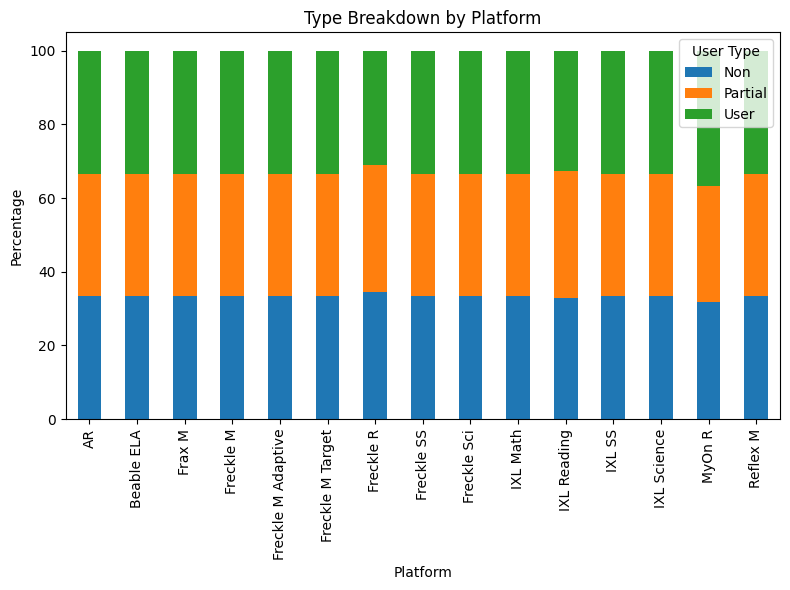

In [20]:


# Full data provided
data = [
    ('IXL Reading Partial', 6.896552), ('IXL Reading Non', 6.551724), ('IXL Reading User', 6.551724),
    ('MyOn R User', 5.172414), ('MyOn R Partial', 4.482759), ('MyOn R Non', 4.482759),
    ('IXL Math Non', 3.448276), ('IXL Math Partial', 3.448276), ('IXL Math User', 3.448276),
    ('Freckle R Partial', 3.448276), ('Freckle R Non', 3.448276), ('AR Non', 3.448276),
    ('AR Partial', 3.448276), ('AR User', 3.448276),
    ('Frax M Partial', 3.103448), ('Frax M User', 3.103448), ('Frax M Non', 3.103448),
    ('Freckle R User', 3.103448), ('Reflex M Non', 2.758621), ('Reflex M Partial', 2.758621),
    ('Reflex M User', 2.758621), ('Freckle M User', 1.724138), ('Freckle M Partial', 1.724138),
    ('Freckle M Non', 1.724138), ('Freckle Sci Non', 1.034483), ('Freckle Sci Partial', 1.034483),
    ('Freckle Sci User', 1.034483), ('Freckle M Target User', 0.689655), ('Freckle M Target Non', 0.689655),
    ('Freckle M Target Partial', 0.689655), ('Freckle M Adaptive Non', 0.689655),
    ('Freckle M Adaptive Partial', 0.689655), ('Freckle M Adaptive User', 0.689655),
    ('IXL Science Partial', 0.689655), ('IXL Science User', 0.689655), ('IXL Science Non', 0.689655),
    ('Freckle SS User', 0.344828), ('Beable ELA User', 0.344828), ('Beable ELA Partial', 0.344828),
    ('Beable ELA Non', 0.344828), ('IXL SS Partial', 0.344828), ('IXL SS Non', 0.344828),
    ('IXL SS User', 0.344828), ('Freckle SS Non', 0.344828), ('Freckle SS Partial', 0.344828)
]

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['title', 'percentage'])

# Extract platform and user type from 'title'
df['platform'] = df['title'].apply(lambda x: ' '.join(x.split()[:-1]))  # Platform/subject (e.g., 'IXL Reading')
df['user_type'] = df['title'].apply(lambda x: ' '.join(x.split()[-1:]))  # User type (e.g., 'Partial User', 'Non User', 'User')

# Normalize percentages within each platform so they sum to 100%
df_grouped = df.groupby('platform')['percentage'].transform(lambda x: x / x.sum() * 100)
df['normalized_percentage'] = df_grouped

# Pivot the DataFrame to create a structure for stacked bar plots
pivot_df = df.pivot(index='platform', columns='user_type', values='normalized_percentage').fillna(0)

# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and title
plt.title('Type Breakdown by Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


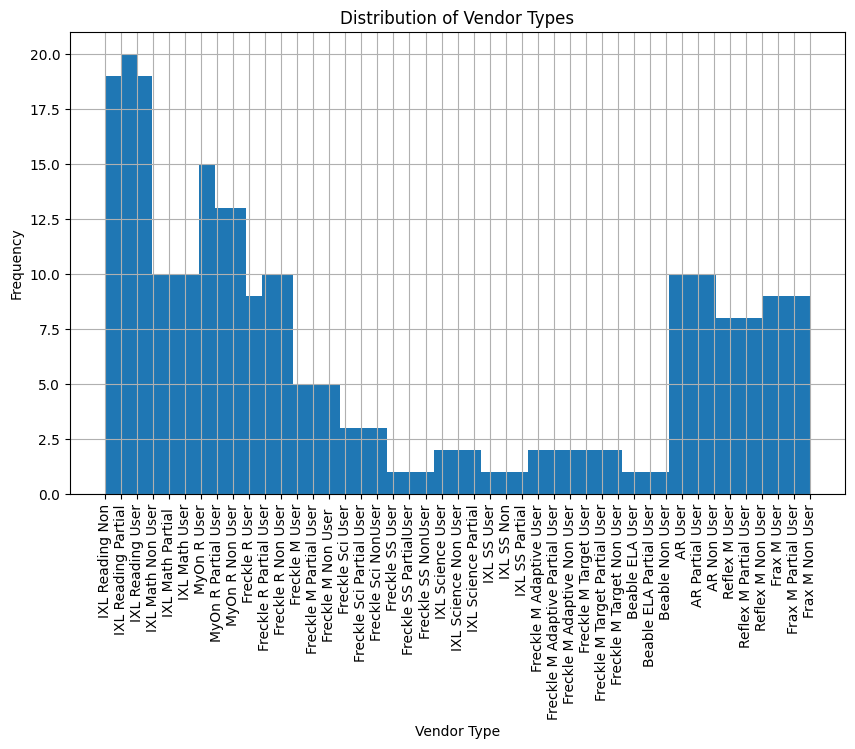

In [21]:
vendor_types['name'].hist(bins=45, figsize=(10, 6))
plt.xticks(rotation=90)
plt.xlabel('Vendor Type')
plt.ylabel('Frequency')
plt.title('Distribution of Vendor Types')
plt.show()

 ### Vendor Usage

 - vendorId 11333 corresponds to multiple IXL subjects (math, science, social studies)
  - will likely need to separate them and give them a different vendorId in `vendor_types`
  - wont be able to tell in `vendor_usage` which subject students are studying, which might be bad?
  - Can't separate subjects in `vendor_usage` because we only have vendorID, no value for what learning platform
 - vendorId 72609 corresponds to just IXL Reading

---

 - 3/7 vendorIds in `vendor_usage` are not listed in `vendor_types`
  - we might need to know what vendor they correspond to
  - no students use those three vendors anyway, so might be irrelevant



In [22]:
vendor_usage #how different students use the learning platforms

,districtId,studentId,year,vendorId,active,usageTypeId,weeklyUsageMinutes
0,18,1480117,2023,140472,0,39,4
1,18,1480117,2023,11333,0,6,0
2,18,1480117,2023,72609,0,3,0
3,18,1480118,2023,140472,0,39,4
4,18,1480118,2023,11333,0,6,0
...,...,...,...,...,...,...,...
70310,18,1804199,2023,11333,0,4,0
70311,18,1804199,2023,72609,0,1,0
70312,18,1804201,2023,11333,0,4,0
70313,18,1804201,2023,72609,0,1,0


### Breakdown of vendor usage (Non-Zero Usage)
~45% of students use IXL for math, science, or social studies
~35% use AR
~20% use IXL Reading

In [23]:
# Calculate the percentage breakdown of 'vendorId' usage
vendor_breakdown = vendor_usage['vendorId'].value_counts(normalize=True) * 100

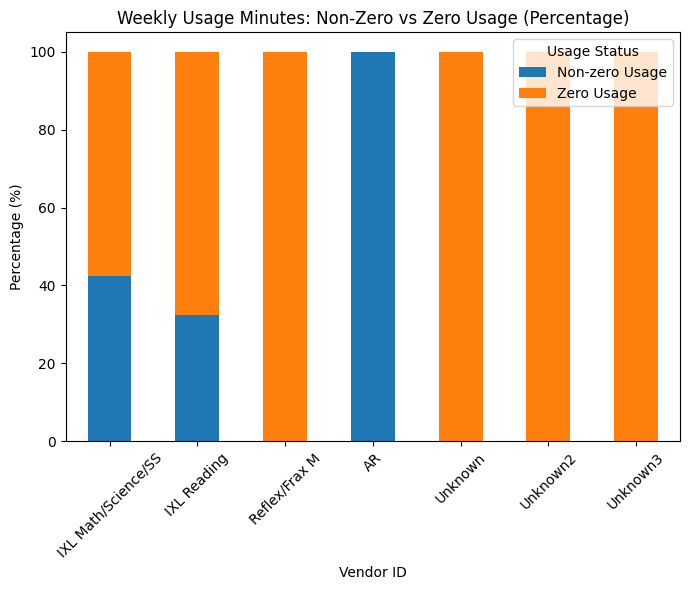

In [24]:

# Separating non-zero and zero usage
non_zero_usage = vendor_usage[vendor_usage['weeklyUsageMinutes'] > 0]
zero_usage = vendor_usage[vendor_usage['weeklyUsageMinutes'] == 0]

# Aggregate data by vendorId for non-zero and zero usage
non_zero_counts = non_zero_usage['vendorId'].value_counts()
zero_counts = zero_usage['vendorId'].value_counts()

# Prepare the data for plotting
vendors = list(set(non_zero_counts.index) | set(zero_counts.index))  # All vendors in either DataFrame
non_zero_values = [non_zero_counts.get(vendor, 0) for vendor in vendors]
zero_values = [zero_counts.get(vendor, 0) for vendor in vendors]

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Non-zero Usage': non_zero_values,
    'Zero Usage': zero_values
}, index=vendors)

# Normalize the values to percentages
data_percentage = data.div(data.sum(axis=1), axis=0) * 100  # Normalize each row to get percentages

# Renaming vendors
rename_dict = {
    72609: 'IXL Reading',
    11333: 'IXL Math/Science/SS',
    132810: 'Unknown',
    138965: 'Unknown2',
    140472: 'AR',
    140574: 'Reflex/Frax M',
    132795: 'Unknown3'
}

# Apply the renaming
data_percentage.rename(index=rename_dict, inplace=True)

# Define your desired order for vendors
desired_order = ['IXL Math/Science/SS', 'IXL Reading', 'Reflex/Frax M', 'AR', 'Unknown', 'Unknown2', 'Unknown3']

# Reorder the DataFrame
data_percentage = data_percentage.reindex(desired_order)

# Plotting
ax = data_percentage.plot(kind='bar', stacked=True, figsize=(7, 6))
plt.title('Weekly Usage Minutes: Non-Zero vs Zero Usage (Percentage)')
plt.xlabel('Vendor ID')
plt.ylabel('Percentage (%)')

# Customizing x-ticks
plt.xticks(ticks=range(len(desired_order)), labels=desired_order, rotation=45)

plt.legend(title='Usage Status')
plt.tight_layout()
plt.show()


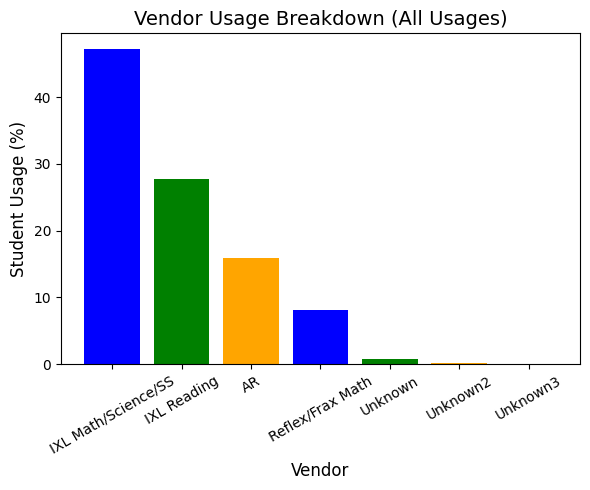

In [25]:
vendor_breakdown = {'IXL Math/Science/SS': 47.217521154803386,
 'IXL Reading': 27.75367986916021,
 'AR': 15.982365071464125,
 'Reflex/Frax Math': 8.151887932873498,
 'Unknown': 0.7452179478063002,
 'Unknown2': 0.09955201592832255,
 'Unknown3': 0.049776007964161276}

plt.figure(figsize=(6, 5))
plt.bar(vendor_breakdown.keys(), vendor_breakdown.values(), color=['blue', 'green', 'orange'])

plt.title('Vendor Usage Breakdown (All Usages)', fontsize=14)
plt.xlabel('Vendor', fontsize=12)
plt.xticks(rotation = 30)
plt.ylabel('Student Usage (%)', fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
# Calculate the percentage breakdown of 'vendorId' usage
vendor_breakdown = vendor_usage['vendorId'].value_counts(normalize=True) * 100

# Filter out rows where 'weeklyUsageMinutes' is not equal to 0
nonzero_vendor_usage = vendor_usage[vendor_usage['weeklyUsageMinutes'] != 0]
nonzero_vendor_usage_breakdown = nonzero_vendor_usage['vendorId'].value_counts(normalize=True) * 100
# Now you can work with the filtered data
(nonzero_vendor_usage_breakdown)


,proportion
vendorId,
11333,44.485585
140472,35.564417
72609,19.949998


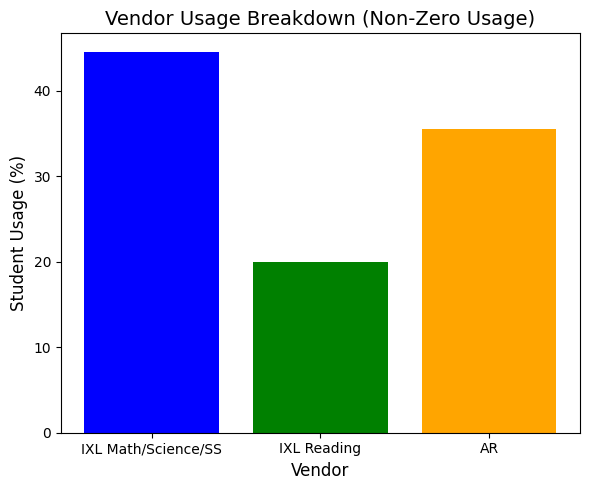

In [27]:
nonzero_vendor_usage_breakdown = {'IXL Math/Science/SS': 44.485585, 'IXL Reading': 19.949998, 'AR':35.564417 }
plt.figure(figsize=(6, 5))
plt.bar(nonzero_vendor_usage_breakdown.keys(), nonzero_vendor_usage_breakdown.values(), color=['blue', 'green', 'orange'])

plt.title('Vendor Usage Breakdown (Non-Zero Usage)', fontsize=14)
plt.xlabel('Vendor', fontsize=12)
plt.ylabel('Student Usage (%)', fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# Calculate the percentage breakdown of 'vendorId' usage
vendor_breakdown = vendor_usage['vendorId'].value_counts(normalize=True) * 100

# Filter out rows where 'weeklyUsageMinutes' is not equal to 0
zero_vendor_usage = vendor_usage[vendor_usage['weeklyUsageMinutes'] == 0]
zero_vendor_usage_breakdown = zero_vendor_usage['vendorId'].value_counts(normalize=True) * 100

zero_vendor_usage_breakdown = {k: v for k, v in zero_vendor_usage_breakdown.items()}

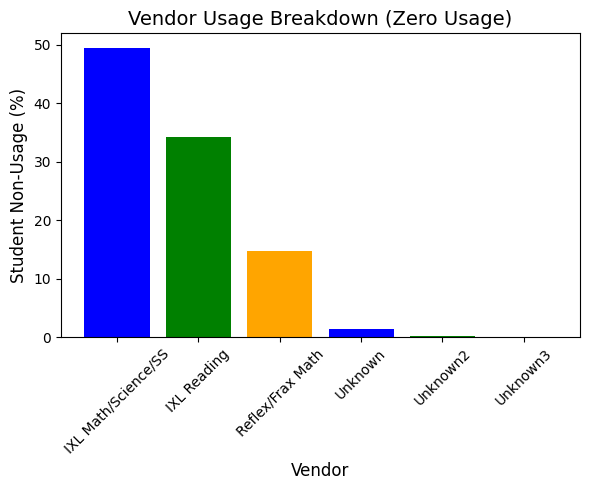

In [29]:
zero_vendor_usage_breakdown= {'IXL Math/Science/SS': 49.44725694803182,
                              'IXL Reading': 34.12284326893274,
                              'Reflex/Frax Math': 14.80524847608224,
                              'Unknown': 1.353445603884699,
                              'Unknown2': 0.18080380204566587,
                              'Unknown3': 0.09040190102283294}
plt.figure(figsize=(6, 5))
plt.bar(zero_vendor_usage_breakdown.keys(), zero_vendor_usage_breakdown.values(), color=['blue', 'green', 'orange'])

plt.title('Vendor Usage Breakdown (Zero Usage)', fontsize=14)
plt.xlabel('Vendor', fontsize=12)
plt.xticks(rotation = 45)
plt.ylabel('Student Non-Usage (%)', fontsize=12)
plt.tight_layout()
plt.show()

## Student Attribute Analysis

- 337 entried represented in student_attributes, 267 are unique students
- 132,258 students in scores dataset, 11,633 are unique
- We only have 2.29% of students represented
**Problematic if we want to use student attributes as a feature*

In [30]:
student_attributes

,districtId,studentId,year,value
0,18,1480395,2023,12
1,18,1480554,2023,11
2,18,1480554,2023,12
3,18,1481892,2023,11
4,18,1482258,2023,11
...,...,...,...,...
332,18,1803970,2023,11
333,18,1804021,2023,11
334,18,1804027,2023,11
335,18,1804048,2023,11


In [31]:
print(len(scores['studentId'].unique()))
print(len(student_attributes['studentId'].unique()))

11633
267


In [32]:
# cross reference scores and student attributes on studentId
difference = ~student_attributes['studentId'].isin(scores['studentId'])
print(difference.sum())

#this is good! all students in student_attributes is in scores

0


## Benchmarks analysis:
- years span [2017 to 2023]
- grade levels [0 to 12]
- 47 unique benchmarks

In [33]:
dataSource = benchmarks['dataSource'].unique()
(dataSource)

array(['value_scantronMath', 'value_scantronReading',
       'value_aspireReadingScaleScore', 'value_StarEarlyLit',
       'value_starMath', 'value_starReading', 'value_actEnglishScore',
       'value_actMathScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore',
       'value_acapELA', 'value_acapELALevel', 'value_acapMath',
       'value_acapMathLevel', 'value_acapScience', 'value_iReadyMath',
       'value_iReadyReading', 'value_starEarlyLitUnified',
       'value_starReadingUnified', 'value_acapLexile',
       'value_starMathUnified', 'value_lexileStar',
       'value_acapScienceLevel', 'value_edulasticMath',
       'value_edulasticELA', 'value_actELAScore',
       'value_edulasticScience', 'value_edulasticHistory',
       'value_edulasticCivics', 'value_edulasticGeography',
       'value_StudySyncELA', 'value_edulasticAlgebra',
       'value_edulasticGeometry', 'value_edulasticPhySci',
       'value_edulasticBio', 'value_edulasticChem',
       '

In [34]:
# Get unique values for each column
unique_values = benchmarks.apply(lambda x: x.unique())

# Display the unique values
for column, values in unique_values.items():
    print(f"{column}: {values}")

print(len(benchmarks['dataSource'].unique()))

id: [    120     121     122     123     124     125     126     127     128
     129     130     131     133     134     135     136     137     138
     530     140     141     531     143     144     532     146     147
     533    2161    5799    2162    2165    2177    5800    5801    5802
    2163    2166    2178    5803    5805    1416    1417    1418    2164
    2167    2179    5806    5807    5808    5809    5810    1419    1420
    2168    2180    5811    5812    5813    5814    1422    1423    2169
    2181    5815    5816    5817    5818    1425    1426    2170    2182
    5819    5820    5821    5822    1428    1429    2171    2183    5823
    5824    5825    5826    1431    1432    2172    2184    5827    5828
    5829    5830    2173    2185    5831    5832    2174    2186    2189
    2190    2191    2192    2193    5833    5834    1434    1435    1436
    1437    2175    2187    3980    3981    3982    3983    3984    5835
    5836    2176    2188    5837    5838    589

In [35]:
len(scores.columns)

715

### Subgroup Analysis

## Below we check the amount of data in the scores table. It appears that only 75/715 (~10.5%) of columns are at least 1% populated. The rest are considered empty, and discarded.
### I also discarded the `ticket` and `scoreDate` columns as they are not useful for our purposes.
### Remaining data is stored in **scores_keep**

In [36]:
(scores == '').sum().unique()

array([     0, 130984, 109961, 132258])

In [37]:
scores['value_IXLMath'].unique()

array([0])

In [38]:
zero_count_per_column = ((scores == 0) | (scores == '')).sum()

num_scores = scores.shape[0]

# Sort column names by ascending zero values
sorted_columns = zero_count_per_column.sort_values().index.tolist()


# Sort by ascending zero counts
sorted_zero_count = zero_count_per_column.sort_values()

# Display the results in ascending order
for column, count in sorted_zero_count.items():
    print(f"Column '{column}' has {(count/num_scores)*100}% zero values.")


# Create a new DataFrame with columns that have at least 1% data filled
scores_keep = sorted_columns[:64]
scores_keep = scores[scores_keep]


Column 'id' has 0.0% zero values.
Column 'districtId' has 0.0% zero values.
Column 'studentId' has 0.0% zero values.
Column 'year' has 0.0% zero values.
Column 'scoreDate' has 0.0% zero values.
Column 'measurementTypeId' has 0.0% zero values.
Column 'studentLevel' has 2.497391462142177% zero values.
Column 'subgroup_specialEd' has 18.80793600387122% zero values.
Column 'subgroup_gender' has 18.80793600387122% zero values.
Column 'subgroup_ell' has 18.80793600387122% zero values.
Column 'value_starMathUnified' has 82.29294258192321% zero values.
Column 'value_starReadingUnified' has 82.29747916950203% zero values.
Column 'value_caseMathLevelExt' has 83.14128445916316% zero values.
Column 'value_lexileStar' has 84.19528497330975% zero values.
Column 'value_edulasticMath' has 86.35848115047861% zero values.
Column 'value_starMath' has 86.9603351026025% zero values.
Column 'value_starReading' has 86.98377413842641% zero values.
Column 'value_edulasticScience' has 90.11628786160384% zero va

In [39]:
scores_keep.columns

Index(['id', 'districtId', 'studentId', 'year', 'scoreDate',
       'measurementTypeId', 'studentLevel', 'subgroup_specialEd',
       'subgroup_gender', 'subgroup_ell', 'value_starMathUnified',
       'value_starReadingUnified', 'value_caseMathLevelExt',
       'value_lexileStar', 'value_edulasticMath', 'value_starMath',
       'value_starReading', 'value_edulasticScience', 'value_edulasticELA',
       'value_StudySyncELA', 'value_acapMathLevel', 'value_acapMath',
       'value_acapELALevel', 'value_acapELA', 'value_acapLexile',
       'value_edulasticHistory', 'value_starEarlyLitUnified',
       'value_StarEarlyLit', 'value_AcapMathRc3', 'value_AcapMathRc2',
       'value_AcapMathRc1', 'value_AcapElaRc3', 'value_AcapElaRc4',
       'value_AcapElaRc5', 'value_AcapElaRc6', 'value_AcapElaRc1',
       'value_AcapElaRc7', 'value_AcapElaRc8', 'value_AcapElaRc2',
       'value_edulasticUsHistory', 'value_acapScienceLevel',
       'value_acapScience', 'value_AcapMathRc4', 'value_edulasticAlge

In [40]:
scores_keep.drop(columns=['ticket', 'scoreDate'], inplace=True)

KeyError: "['ticket'] not found in axis"

### Seeing what tests students have taken
- broke down `scores_keep` into their respective subjects
- everyone has at least one math score!
- Math: 11633
- Science: 7266
- History: 4955
- Reading/ELA: 11308

In terms of test usage,

In [41]:
math_columns = [
    'value_starMathUnified', 'value_caseMathLevelExt', 'value_edulasticMath',
    'value_starMath', 'value_acapMathLevel', 'value_acapMath', 'value_AcapMathRc3',
    'value_AcapMathRc2', 'value_AcapMathRc1', 'value_AcapMathRc4', 'value_AcapMathRc5',
    'value_actMathScore', 'value_edulasticAlgebra', 'value_edulasticGeometry'
]

science_columns = [
    'value_edulasticScience', 'value_acapScienceLevel', 'value_acapScience',
    'value_edulasticBio', 'value_edulasticPhySci', 'value_AcapSciRc3',
    'value_AcapSciRc2', 'value_AcapSciRc1', 'value_AcapSciRc4',
    'value_edulasticEnvironmental', 'value_actScienceScore',
]

history_columns = [
    'value_edulasticHistory', 'value_edulasticUsHistory', 'value_edulasticWH'
]

reading_columns = [
    'value_starReadingUnified', 'value_lexileStar', 'value_starReading',
    'value_edulasticELA', 'value_StudySyncELA', 'value_acapELALevel',
    'value_acapELA', 'value_acapLexile', 'value_starEarlyLitUnified',
    'value_StarEarlyLit', 'value_AcapElaRc3', 'value_AcapElaRc4',
    'value_AcapElaRc5', 'value_AcapElaRc6', 'value_AcapElaRc1',
    'value_AcapElaRc7', 'value_AcapElaRc8', 'value_AcapElaRc2',
    'value_AcapElaRc9', 'value_AcapElaRc10', 'value_acapReadSubscore',
    'value_actEnglishScore', 'value_actReadingScore',
]

miscellaneous_columns = [
    'id', 'districtId', 'studentId', 'year', 'measurementTypeId', 'studentLevel', 'subgroup_specialEd',
    'subgroup_gender', 'subgroup_ell', 'value_actCompositeScore', 'value_edulasticAP', 'value_actStemScore'
]

subject_columns = {
    'Math': math_columns,
    'Science': science_columns,
    'History': history_columns,
    'Reading/ELA': reading_columns,

}

In [42]:
# Sum all the elements in all lists (columns)
total_columns = sum(len(columns) for columns in subject_columns.values())

print(f"Total number of columns across all groups: {total_columns}")


Total number of columns across all groups: 51


In [43]:
grouped_columns = math_columns + science_columns + history_columns + reading_columns + miscellaneous_columns

# Find missing columns
missing_columns = set(scores_keep) - set(grouped_columns)

# Output the missing columns
print(f"Missing columns: {missing_columns}")

Missing columns: {'scoreDate'}


In [44]:
# Checking if each student has at least one score in each subject
students_with_scores_count = {}

for subject, columns in subject_columns.items():
    # Create a DataFrame for the current subject
    subject_data = scores_keep[['studentId'] + columns]

    # Check if any score is present (non-zero)
    has_score = (subject_data[columns] != 0).any(axis=1)

    # Count unique student IDs with at least one score in the subject
    students_count = subject_data[has_score]['studentId'].nunique()

    # Store the result in the dictionary
    students_with_scores_count[subject] = students_count

print("Number of students:", scores_keep['studentId'].nunique())
for subject, count in students_with_scores_count.items():
    print(f"At least one score in {subject}: {count}")


Number of students: 11633
At least one score in Math: 11633
At least one score in Science: 7266
At least one score in History: 4955
At least one score in Reading/ELA: 11308


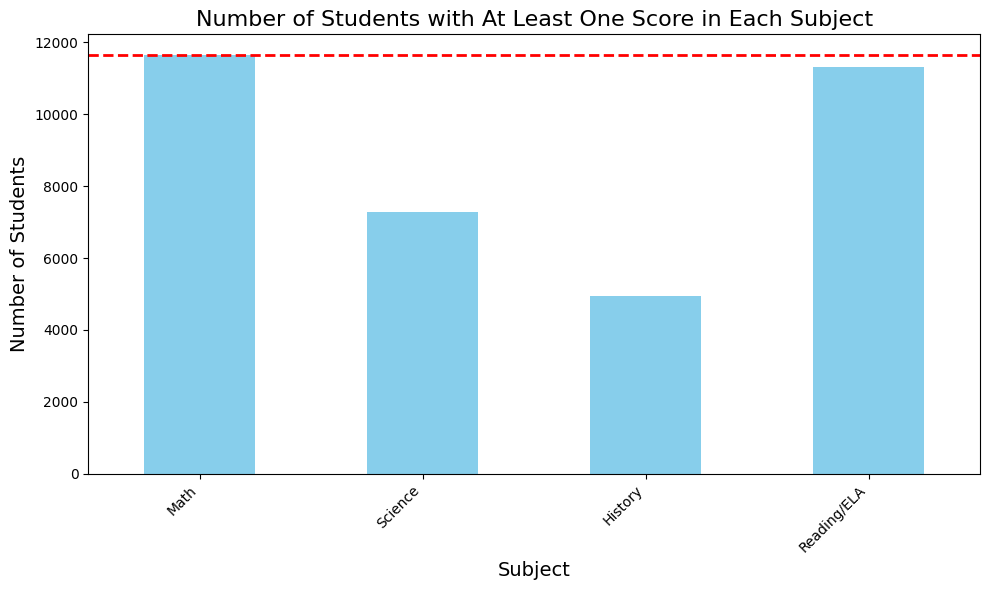

In [45]:
students_scores_series = pd.Series(students_with_scores_count)

# Create a bar plot
plt.figure(figsize=(10, 6))
students_scores_series.plot(kind='bar', color='skyblue')
plt.axhline(y=11633, color='red', linestyle='--', linewidth=2)


# Add title and labels
plt.title('Number of Students with At Least One Score in Each Subject', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for better visibility

# Display the plot
plt.tight_layout()
plt.show()

In [46]:
print(students_with_scores_count)


{'Math': 11633, 'Science': 7266, 'History': 4955, 'Reading/ELA': 11308}


In [47]:
#Percentage breakdowns
grade_breakdown = scores_keep['studentLevel'].value_counts(normalize=True) * 100
year_breakdown = scores_keep['year'].value_counts(normalize=True) * 100

# test breakdown
columns_of_interest = ['value_starMathUnified',
       'value_starReadingUnified', 'value_caseMathLevelExt',
       'value_lexileStar', 'value_edulasticMath', 'value_starMath',
       'value_starReading', 'value_edulasticScience', 'value_edulasticELA',
       'value_StudySyncELA', 'value_acapMathLevel', 'value_acapMath',
       'value_acapELALevel', 'value_acapELA', 'value_acapLexile',
       'value_edulasticHistory', 'value_starEarlyLitUnified',
       'value_StarEarlyLit', 'value_AcapMathRc3', 'value_AcapMathRc2',
       'value_AcapMathRc1', 'value_AcapElaRc3', 'value_AcapElaRc4',
       'value_AcapElaRc5', 'value_AcapElaRc6', 'value_AcapElaRc1',
       'value_AcapElaRc7', 'value_AcapElaRc8', 'value_AcapElaRc2',
       'value_edulasticUsHistory', 'value_acapScienceLevel',
       'value_acapScience', 'value_AcapMathRc4', 'value_edulasticAlgebra',
       'value_edulasticBio', 'value_edulasticGeometry', 'value_edulasticWH',
       'value_AcapSciRc3', 'value_AcapSciRc2', 'value_AcapSciRc1',
       'value_actEnglishScore', 'value_actMathScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore',
       'value_edulasticPhySci', 'value_AcapMathRc5', 'value_AcapSciRc4',
       'value_AcapElaRc9', 'value_AcapElaRc10', 'value_actStemScore',
       'value_acapReadSubscore', 'value_edulasticEnvironmental',
       'value_edulasticAP']

# Calculate the total number of rows in the DataFrame
total_rows = len(scores)

# Calculate the percentage of non-zero values for each column
test_breakdown = scores_keep[columns_of_interest].astype(bool).sum(axis=0) / total_rows * 100

print(grade_breakdown)
print(year_breakdown)


studentLevel
 8     12.703957
 6     12.127055
 7     12.024225
 3     11.669615
 2     11.284762
 5     11.155469
 4     10.936200
 9      4.089734
 10     3.326831
 1      3.250465
 11     3.086392
 0      2.497391
 12     1.825220
 62     0.015878
 56     0.004537
 52     0.001512
-1      0.000756
Name: proportion, dtype: float64
year
2023    100.0
Name: proportion, dtype: float64


In [48]:
(test_breakdown)

,0
value_starMathUnified,17.707057
value_starReadingUnified,17.702521
value_caseMathLevelExt,16.858716
value_lexileStar,15.804715
value_edulasticMath,13.641519
value_starMath,13.039665
value_starReading,13.016226
value_edulasticScience,9.883712
value_edulasticELA,9.380151
value_StudySyncELA,9.208517


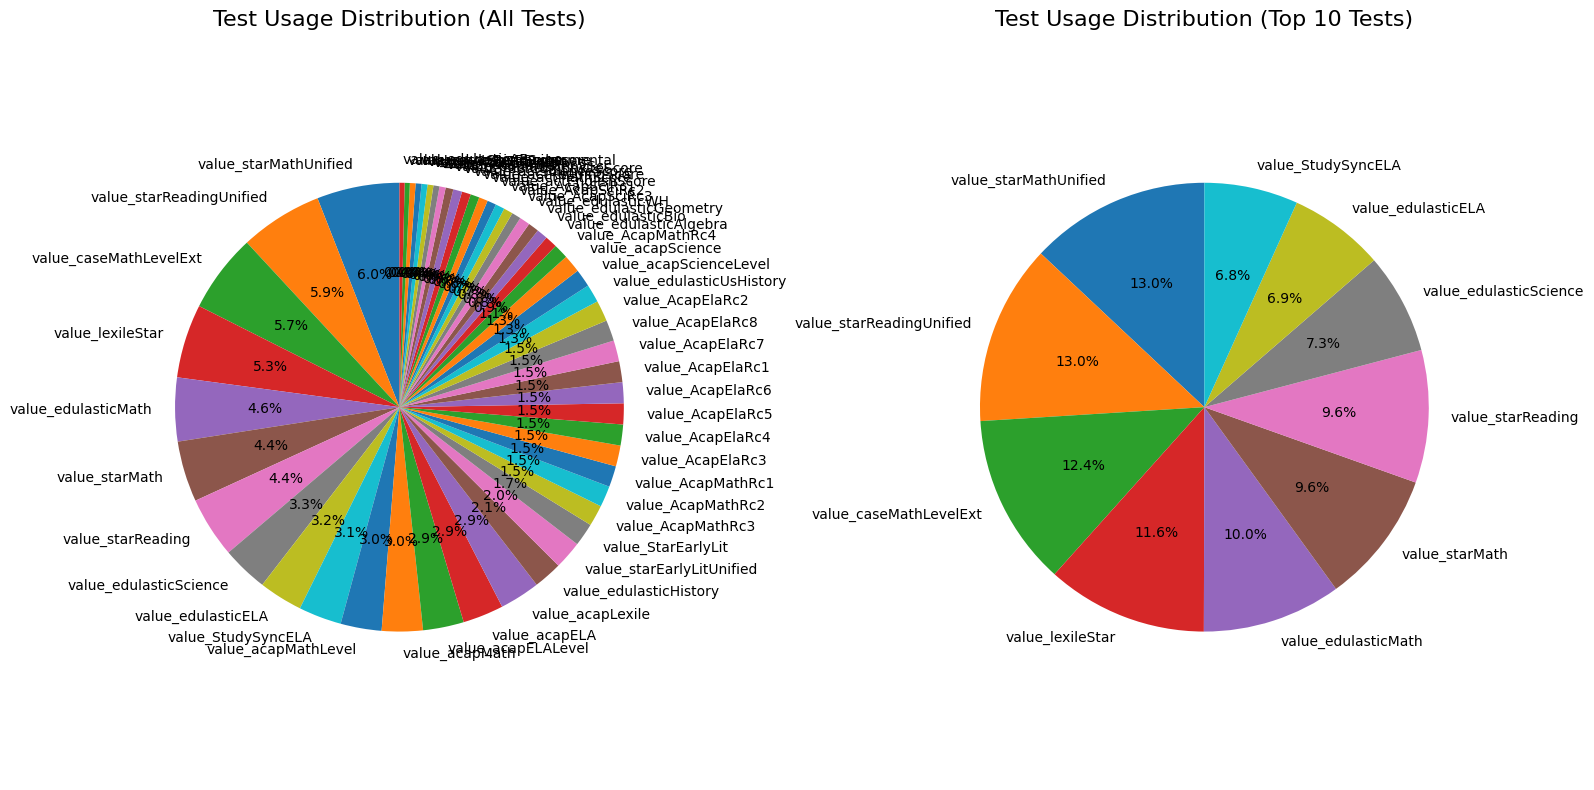

In [49]:
# top 10 tests
top_ten_tests = test_breakdown.nlargest(10)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart for all scores on the left
axs[0].pie(test_breakdown, labels=test_breakdown.index, autopct='%1.1f%%', startangle=90)
axs[0].axis('equal')  # Ensure pie is drawn as a circle
axs[0].set_title('Test Usage Distribution (All Tests)', fontsize=16)

# Plot the pie chart for the top ten scores on the right
axs[1].pie(top_ten_tests, labels=top_ten_tests.index, autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')  # Ensure pie is drawn as a circle
axs[1].set_title('Test Usage Distribution (Top 10 Tests)', fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()

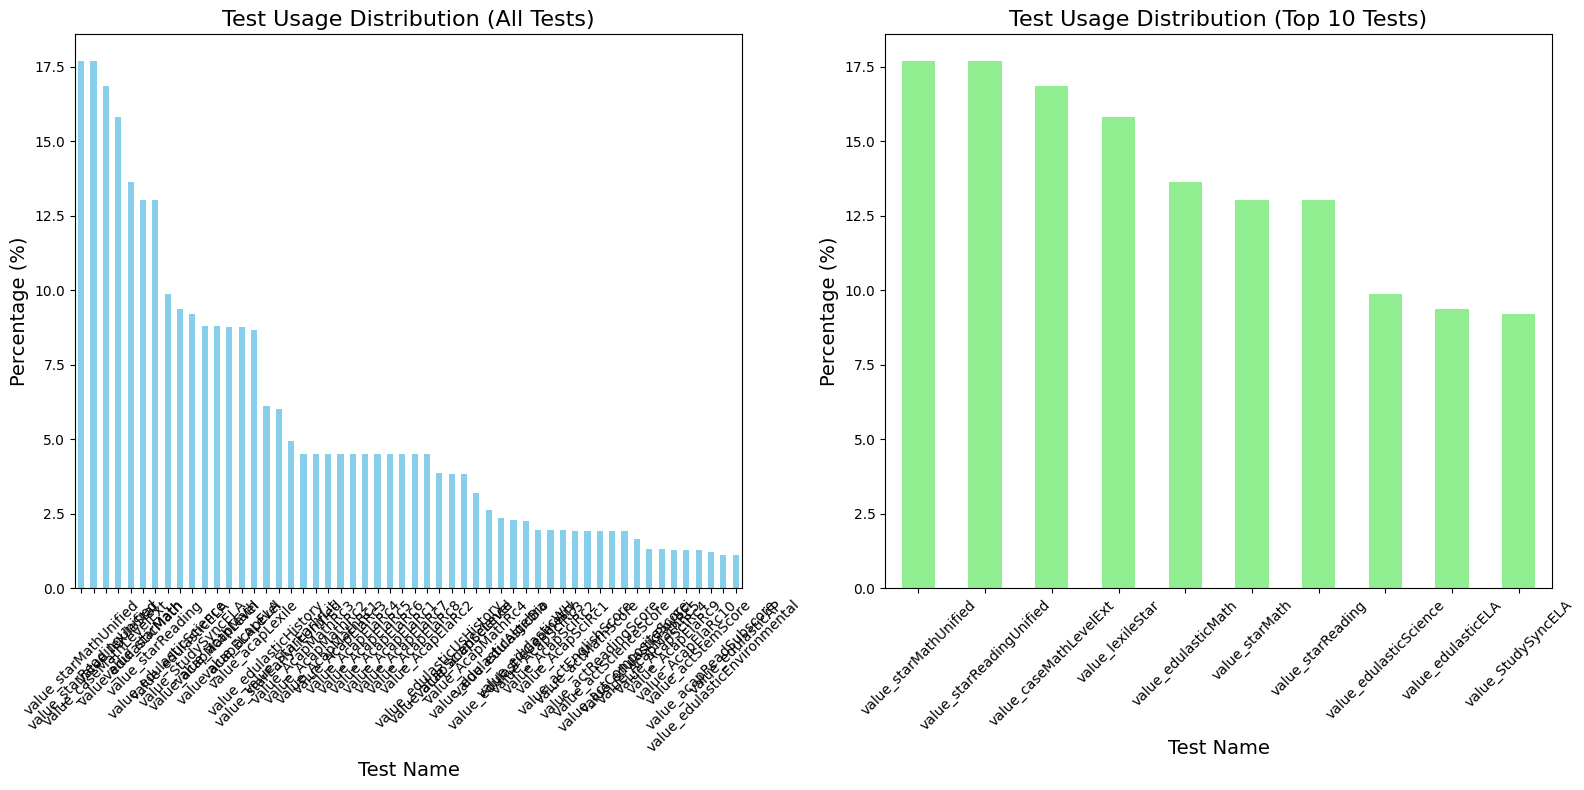

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Bar chart for all scores on the left
test_breakdown.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Test Usage Distribution (All Tests)', fontsize=16)
axs[0].set_xlabel('Test Name', fontsize=14)
axs[0].set_ylabel('Percentage (%)', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-tick labels for better visibility

# Bar chart for the top ten scores on the right
top_ten_tests.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Test Usage Distribution (Top 10 Tests)', fontsize=16)
axs[1].set_xlabel('Test Name', fontsize=14)
axs[1].set_ylabel('Percentage (%)', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-tick labels for better visibility

# Display the plots
plt.tight_layout()
plt.show()

## Deal with NaN values.. there are none, YIPPEE!!

In [52]:
# replace NaNs with zeros
# value_scantronMath is the only column with NaN values, replace with zeros

nan_count = np.sum(scores_keep.isnull())
for column, count in nan_count.items():
    print(f"Column '{column}' has {count} NaN values.")
# scores_keep['value_scantronMath'].fillna(value=0, inplace=True)
# nan_count = np.sum(scores_keep.isnull())

Column 'id' has 0 NaN values.
Column 'districtId' has 0 NaN values.
Column 'studentId' has 0 NaN values.
Column 'year' has 0 NaN values.
Column 'scoreDate' has 0 NaN values.
Column 'measurementTypeId' has 0 NaN values.
Column 'studentLevel' has 0 NaN values.
Column 'subgroup_specialEd' has 0 NaN values.
Column 'subgroup_gender' has 0 NaN values.
Column 'subgroup_ell' has 0 NaN values.
Column 'value_starMathUnified' has 0 NaN values.
Column 'value_starReadingUnified' has 0 NaN values.
Column 'value_caseMathLevelExt' has 0 NaN values.
Column 'value_lexileStar' has 0 NaN values.
Column 'value_edulasticMath' has 0 NaN values.
Column 'value_starMath' has 0 NaN values.
Column 'value_starReading' has 0 NaN values.
Column 'value_edulasticScience' has 0 NaN values.
Column 'value_edulasticELA' has 0 NaN values.
Column 'value_StudySyncELA' has 0 NaN values.
Column 'value_acapMathLevel' has 0 NaN values.
Column 'value_acapMath' has 0 NaN values.
Column 'value_acapELALevel' has 0 NaN values.
Column

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## We want to know if there are score metrics that contain a significant amount of data, but arent listed in benchmarks['dataSource']. (TA)
##The result is that a few columns have a non-negligible number of points (>1,000). It might be helpful to have benchmark values for these tests as well.

##scores_to_add = List of metrics with >1,000 points

In [53]:
# metrics not in benchmarks['dataSource'], there are 670 columns.
missing_metrics = scores.columns.difference(benchmarks['dataSource'])
missing_metrics_df = scores[missing_metrics]
print(missing_metrics_df.columns)
print(len(missing_metrics_df.columns))

Index(['districtId', 'id', 'measurementTypeId', 'scoreDate', 'studentId',
       'studentLevel', 'subGroup_bottom25', 'subgroup_TCAPELALevel',
       'subgroup_TCAPMathLevel', 'subgroup_ell',
       ...
       'value_widaWriting', 'value_workkeysAMLevel', 'value_workkeysAMScale',
       'value_workkeysGLLevel', 'value_workkeysGLScale',
       'value_workkeysLevelScore', 'value_workkeysScaleScore',
       'value_workkeysWDLevel', 'value_workkeysWDScale', 'year'],
      dtype='object', length=670)
670


In [54]:
scores.shape

(132258, 715)

In [55]:
zero_count_per_column = (missing_metrics_df == 0).sum()
num_scores = missing_metrics_df.shape[0]
print(num_scores)

# Sort column names by ascending zero values
sorted_columns = zero_count_per_column.sort_values().index.tolist()

# Sort by ascending zero counts
sorted_zero_count = zero_count_per_column.sort_values()

# Display the results in ascending order
# for column, count in sorted_zero_count.items():
#     print(f"Column '{column}' has {num_scores - count} values.")
    # print(f"Column '{column}' has {(count/num_scores)*100}% zero values.")
    # print(f"Column '{column}' has {count} zero values.")

132258


In [56]:
scores_to_add = sorted_zero_count[sorted_zero_count <= 130588 ] #number comes from the first column that had over 1,000 nonzero points (mapScience)
scores_to_add = scores_to_add.index.tolist()
scores_to_add = scores_to_add[4:]

# metrics that have more than 1% useful points that arent mentioned in the benchmarks dataset.
for score in scores_to_add:
  print(score)

value_caseMathLevelExt
value_caseGeoLevelExt
value_caseEngILevelExt
value_caseEngIILevelExt
value_caseBioLevelExt
value_caseAlgILevelExt
value_caseAlgIILevelExt
ticket
year
studentId
id
measurementTypeId
scoreDate
studentLevel
subgroup_ell
subgroup_specialEd
subgroup_gender
value_AcapMathRc3
value_AcapMathRc2
value_AcapMathRc1
value_AcapElaRc8
value_AcapElaRc7
value_AcapElaRc1
value_AcapElaRc5
value_AcapElaRc4
value_AcapElaRc3
value_AcapElaRc2
value_AcapElaRc6
value_AcapMathRc4
value_AcapSciRc3
value_AcapSciRc1
value_AcapSciRc2
value_AcapMathRc5
value_AcapSciRc4
value_AcapElaRc10
value_actStemScore
value_AcapElaRc9


In [57]:
# track unique values to see what rows should be removed

# Get unique values for each column
unique_values = scores_keep.apply(lambda x: x.unique())

# Display the unique values
for column, values in unique_values.items():
    print(f"{column}: {values}")

id: [3268686 4933778 5441518 ... 7719120 7719121 7719122]
districtId: [18]
studentId: [1480117 1480118 1480120 ... 2513587 2513589 2513590]
year: [2023]
scoreDate: ['0000-00-00']
measurementTypeId: [ 4  1  2  6  7  3 18  9  5  8 10 11 12 13 14 15 16 17 40]
studentLevel: [11 12 56 10  8  6  7  9  5  3  4  2  1  0 52 62 -1]
subgroup_specialEd: [0 1 3]
subgroup_gender: [0 1 2]
subgroup_ell: [0 2 1]
value_starMathUnified: [   0  766  960 1157 1203 1143  954 1094 1153  912 1169 1103  963 1053
 1014 1121  911 1126 1057  971  957 1007 1127 1151  752 1015 1065 1156
 1048 1049  987 1072 1221 1076  986 1028 1172 1111 1133 1179 1178 1009
 1063 1102 1056 1142 1042  979 1139 1005 1034  953 1087 1036  965  799
  839 1075  761 1078  931 1130  972 1119 1138 1043 1093 1110 1067 1105
 1058 1044 1071 1020 1166 1068 1155 1123 1037  792  780  770  746  956
  964 1113 1187 1022 1134 1128 1131 1162 1018 1106 1099 1108 1090 1041
  974  998 1024  982 1066 1222 1171 1129 1069  879  997 1177  973 1215
 1158 1050

## Below we analyze the rows that don't correspond to traditional grade levels. I found that the majority of them (studentLevel = 52, 56, -1) are missing almost, if not all, test score values.
## The remaining grade, 62, has scores that don't correspond to any one grade level, making consolidation difficult.
## Therefore we might want to discard all rows whose grades correspond to any of the 4 listed.

In [58]:
# looking at weird grade levels
levels_to_keep = [52, 62, 56, -1, 0]
# levels_to_keep = []

# Create a new DataFrame by filtering the 'scores' DataFrame
level_scores = scores_keep[scores_keep['studentLevel'].isin(levels_to_keep)]

# Display the new filtered DataFrame
(level_scores)


,id,districtId,studentId,year,scoreDate,measurementTypeId,studentLevel,subgroup_specialEd,subgroup_gender,subgroup_ell,...,value_actCompositeScore,value_edulasticPhySci,value_AcapMathRc5,value_AcapSciRc4,value_AcapElaRc9,value_AcapElaRc10,value_actStemScore,value_acapReadSubscore,value_edulasticEnvironmental,value_edulasticAP
67,7480499,18,1480134,2023,0000-00-00,3,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69275,4720037,18,1487367,2023,0000-00-00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69276,5428366,18,1487367,2023,0000-00-00,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69277,6999930,18,1487367,2023,0000-00-00,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69278,7001489,18,1487367,2023,0000-00-00,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132235,7452744,18,2513586,2023,0000-00-00,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132236,7452821,18,2513586,2023,0000-00-00,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132237,7452745,18,2513587,2023,0000-00-00,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132238,7452822,18,2513587,2023,0000-00-00,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# track unique values to see what rows should be removed

# Get unique values for each column
unique_values = level_scores.apply(lambda x: x.unique())

# Display the unique values
for column, values in unique_values.items():
    print(f"{column}: {values}")

id: [7480499 4720037 5428366 ... 7452745 7452822 7452823]
districtId: [18]
studentId: [1480134 1487367 1487368 1487378 1487381 1487384 1487388 1487389 1487393
 1488398 1488399 1488404 1488405 1488407 1488408 1488411 1488479 1488481
 1488573 1488575 1488583 1488634 1488976 1488981 1488982 1488983 1488984
 1488989 1489036 1489058 1489060 1489119 1489170 1489171 1489172 1489174
 1489332 1489645 1489695 1490002 1490165 1490168 1490175 1490223 1490350
 1490354 1490359 1490360 1490361 1490362 1490363 1490367 1490370 1490374
 1490377 1490378 1490379 1490380 1490381 1490382 1490383 1490384 1490385
 1490386 1490388 1490394 1490395 1490396 1490397 1490398 1490403 1490404
 1490407 1490408 1490409 1490410 1490411 1490412 1490413 1490418 1490419
 1490422 1490426 1490429 1490430 1490431 1490432 1490436 1490441 1490442
 1490449 1490450 1490460 1490461 1490462 1490463 1490464 1490465 1490573
 1490593 1490603 1490629 1490637 1490648 1490734 1490741 1490761 1490771
 1490781 1490791 1490802 1490824 14908

In [60]:
# Create a new DataFrame by filtering rows where 'value_edulasticMath' and 'value_StudySyncELA' are non-zero
# filtered_scores = scores_keep[(scores_keep['value_edulasticMath'] != 0)]
filtered_scores = scores_keep[(scores_keep['value_StudySyncELA'] != 0)]

# Display the new filtered DataFrame
(filtered_scores)




,id,districtId,studentId,year,scoreDate,measurementTypeId,studentLevel,subgroup_specialEd,subgroup_gender,subgroup_ell,...,value_actCompositeScore,value_edulasticPhySci,value_AcapMathRc5,value_AcapSciRc4,value_AcapElaRc9,value_AcapElaRc10,value_actStemScore,value_acapReadSubscore,value_edulasticEnvironmental,value_edulasticAP
36,4924907,18,1480127,2023,0000-00-00,1,12,0,0,0,...,0,0,0,0,0,0,0,0,0,89
37,5441972,18,1480127,2023,0000-00-00,2,12,0,0,0,...,0,0,0,0,0,0,0,0,0,74
38,7468558,18,1480127,2023,0000-00-00,7,12,0,0,0,...,0,0,0,0,0,0,0,0,0,76
40,7561758,18,1480127,2023,0000-00-00,18,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,4924904,18,1480138,2023,0000-00-00,1,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131241,7471074,18,2513487,2023,0000-00-00,7,6,3,2,1,...,0,0,0,0,0,0,0,0,0,0
131242,7561657,18,2513487,2023,0000-00-00,18,6,3,2,1,...,0,0,0,0,0,0,0,0,0,0
132044,7471075,18,2513560,2023,0000-00-00,7,7,3,1,2,...,0,0,0,0,0,0,0,0,0,0
132120,7471076,18,2513574,2023,0000-00-00,7,6,3,1,2,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# track unique values to see what rows should be removed

# Get unique values for each column
unique_values = filtered_scores.apply(lambda x: x.unique())

# Display the unique values
for column, values in unique_values.items():
    print(f"{column}: {values}")

id: [4924907 5441972 7468558 ... 7471075 7471076 7561681]
districtId: [18]
studentId: [1480127 1480138 1480211 ... 2513487 2513560 2513574]
year: [2023]
scoreDate: ['0000-00-00']
measurementTypeId: [ 1  2  7 18  3]
studentLevel: [12 11  8 10  7  9  6  5  3  4  2  0  1 62 -1]
subgroup_specialEd: [0 1 3]
subgroup_gender: [0 1 2]
subgroup_ell: [0 2 1]
value_starMathUnified: [0]
value_starReadingUnified: [0]
value_caseMathLevelExt: ['0' '']
value_lexileStar: [0]
value_edulasticMath: [  0  88  93  92  90  30  35  68  41  50  60  58  83  89  67  87  65  64
  79  76  53  59  74  70  82  78  61  72  63  38  43  27  85  71  97  91
  69  44  37  31  28  32  96  42  66  54  34  75  84  95  86  80  81  62
  73  47  56  57  98  55  52  45  46  29  51  49  77  99  94  39  48 100
  36  25  33  20  40  26  22   7  14  24  21  16  23  15  17  13  10  18
  19  12  11   8]
value_starMath: [0]
value_starReading: [0]
value_edulasticScience: [  0  92  91  95  33  38  68  52  74  62  65  90  89  87  83  67  